# Numpy Things

**imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. meshgrid

[ X , Y ] = meshgrid( x , y ) returns 2-D grid coordinates based on the coordinates contained in vectors x and y . X is a matrix where each row is a copy of x , and Y is a matrix where each column is a copy of y . The grid represented by the coordinates X and Y has length(y) rows and length(x) columns. (Ref: Google)

In [2]:
x = np.linspace(1, 2, 2)
y = np.linspace(2, 3, 2)

In [3]:
x

array([1., 2.])

In [4]:
y

array([2., 3.])

In [5]:
np.meshgrid(x, y)

[array([[1., 2.],
        [1., 2.]]),
 array([[2., 2.],
        [3., 3.]])]

For our reference, what it does it it forms a grid (a n dimensional grid may be) with the combinations of upper and lower bounded limits for x and y. Basically the matrix formed is:

$$[u, v^{T}] = meshgrid(u,v)$$ in case the size is same

## Thoughts on this. 

Suppose we want to construct a grid where a lower bound and upper bound on axes are as follows
- Through x: [1, 2]
- Trough y: [2, 3]

So, we need to construct a grid where x starts from 1 and ends at 2
And for y it starts from 2 and ends at 3

Possible points of our grid are:
(1,2), (2,2), (1, 3), (3,3)

If we were to flatten a meshgrid items, and compute the cartesian product that's the result.

All of the referen examples below are taken from: https://krajit.github.io/sympy/vectorFields/vectorFields.html i've tried to deconstruct what's happening mathematically and programetically in this notebook.

## 2. np.hypot
- Plots a hypotenous of a given right side triangle.
- For given np.plot(x, y) calulates

$$
np.hypot(x,y) = \sqrt{x^2+y^2}
$$

In [6]:
np.hypot(3, 4)

5.0

# Quiver Plot

Proto: plt.quiver(x, y, u, v, np.hypot(u, v), cmap=plt.cm.gist_heat_r, scale=25)

# Example 1: Plot the vector filed:

$$ \vec{F_{(x,y)}} = x \hat{i} - y\hat{j} $$


Looking into the given equation of vector field, it can be realized that, it it aligned unitely along the basis of $ \vec{i} $ and negatively accross $\vec{j}$, so it can be thought of a vector which has a direction of -45 degree from orgin.

Forming the scalar quantity accross the basis of our vector.

In [7]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

Forming our grid on the lower and upper bound

In [8]:
x, y = np.meshgrid(x, y)

Magintude of basis $\hat{i}$ and $\hat{j}$

In [9]:
u = 1
v = -1

Plotting the field

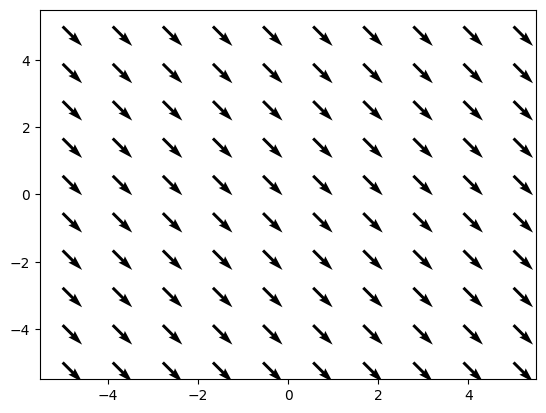

In [10]:
plt.quiver(x, y, u, v)
plt.show()

# Example2: Plot the vector field


$$\vec{F_{(x,y)}}=-\frac{y}{\sqrt{x^2+y^2}}\hat{i}+\frac{x}{\sqrt{x^2+y^2}}\hat{j}$$

Let's start by defining our grid, we would like to use a grid starting from -5 to 5 inclusive accross x and y

In [11]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

Forming the co-ordinates for our grid

In [12]:
x, y = np.meshgrid(x, y)

Applying the transformation accross the basis.

In [13]:
u = -y/np.sqrt(x**2+y**2)
v = x/np.sqrt(x**2+y**2)

Our plot

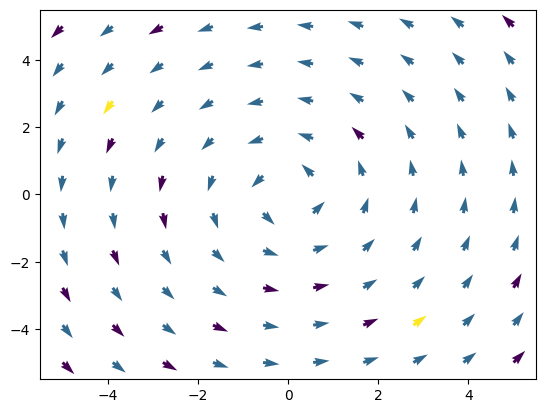

In [14]:
plt.quiver(x, y, u, v, np.hypot(u, v), scale=30)
plt.show()

## Example 4: Plot the 3d vector field

$$\vec{F_{(x, y, z)}} = sin(\pi x) cos(\pi y) cos(\pi z)  \hat{i} - cos(\pi x) sin(\pi y) cos(\pi z) \hat{j} +  \sqrt{\frac{2}{3}} cos(\pi x) cos(\pi y) sin(\pi z) \hat{k}$$

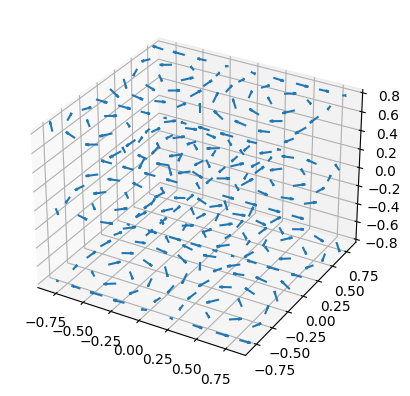

In [15]:
ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()